In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
import sqlite3

with sqlite3.connect("../db.sqlite3") as connection:
    cursor = connection.cursor()
    cursor.execute("""
        SELECT 
            product.name AS name,
            product.price AS price,
            orderitem.quantity AS quantity,
            "order".datetime
        FROM 
            restaurant_orderitem AS orderitem
        INNER JOIN 
            restaurant_product AS product
            ON orderitem.product_id = product.id
        INNER JOIN 
            restaurant_order AS "order"
            ON orderitem.order_id = "order".id
    """)
    rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=["name", "price", "quantity", "datetime"])
df.to_csv("restaurant_data.csv", index=False)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

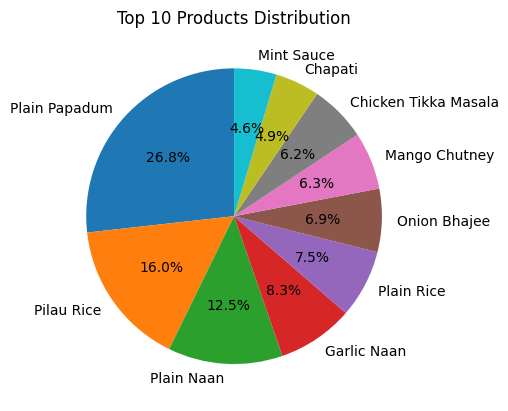

In [4]:
gr = df.groupby("name")["quantity"].sum().reset_index()
total_quantity = gr["quantity"].sum()
gr["percentage"] = (gr["quantity"] / total_quantity) * 100
top_10 = gr.sort_values(by="quantity", ascending=False).head(10)

labels = top_10['name']
sizes = top_10['percentage']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Products Distribution")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

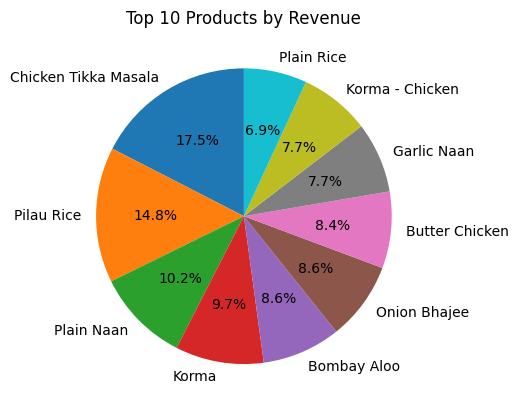

In [5]:
df['item_price'] = df['price'] * df['quantity']
grouped = df.groupby('name')['item_price'].sum().reset_index()
total_revenue = grouped['item_price'].sum()
grouped['percentage'] = (grouped['item_price'] / total_revenue) * 100
top_10 = grouped.sort_values(by='item_price', ascending=False).head(10)
labels = top_10['name']
sizes = top_10['percentage']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Products by Revenue")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

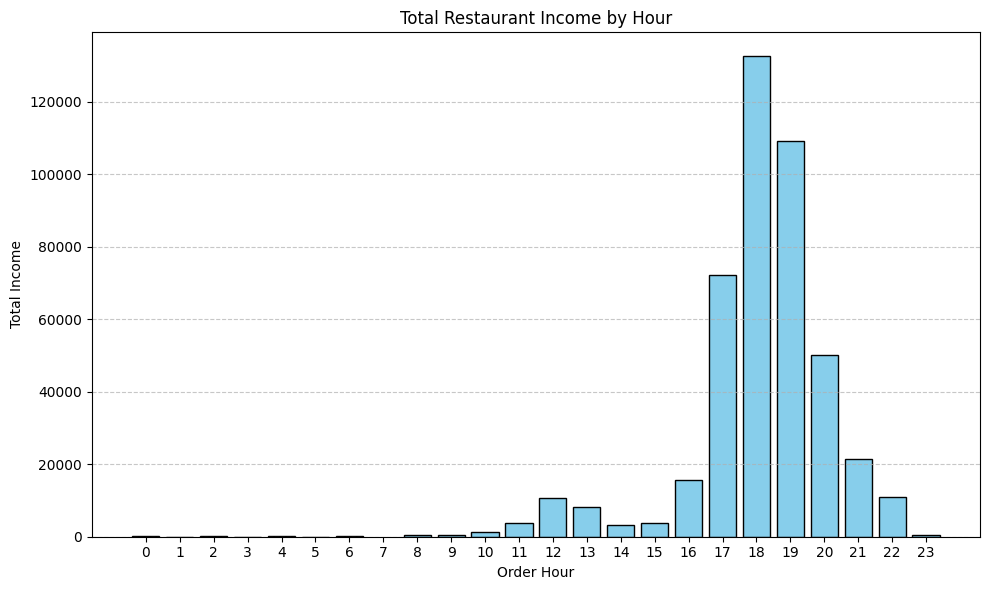

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['order_hour'] = df['datetime'].dt.hour
hourly_income = df.groupby('order_hour')['item_price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(hourly_income['order_hour'], hourly_income['item_price'], color='skyblue', edgecolor='black')
plt.xticks(range(0, 24))
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

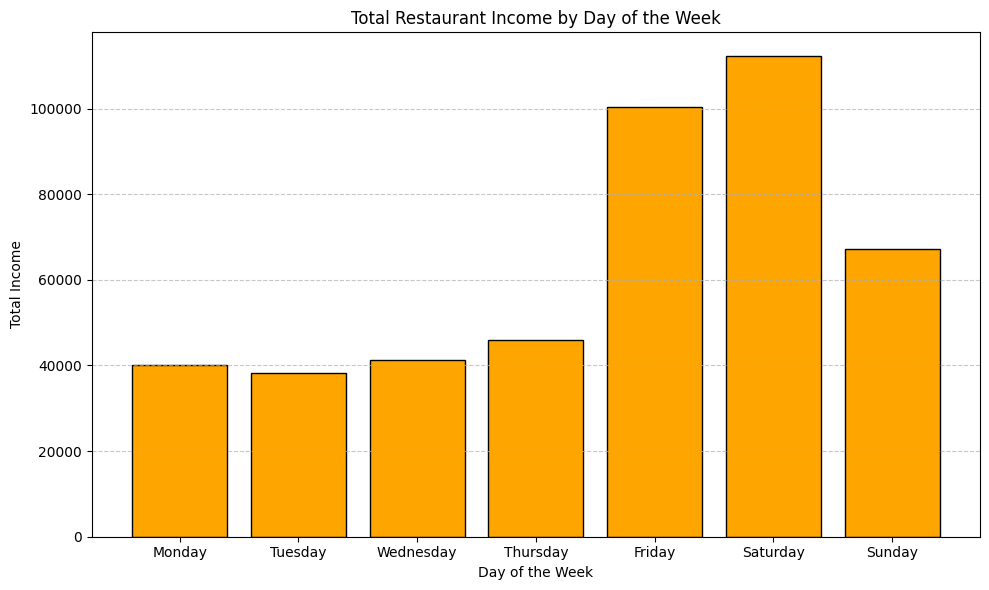

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['order_day_of_week'] = df['datetime'].dt.dayofweek
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['order_day_name'] = df['order_day_of_week'].map(days_mapping)
day_income = df.groupby('order_day_name')['item_price'].sum().reindex(days_mapping.values()).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(day_income['order_day_name'], day_income['item_price'], color='orange', edgecolor='black')
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Day of the Week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()